In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
from datetime import datetime

import pyautogui
import pygetwindow as gw
import keyboard
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [3]:
# launch chrome dino
try:
    options = Options()
    options.add_argument("--window-size=800,800")
    driver = webdriver.Chrome(executable_path='./chromedriver', options=options)
    driver.get('chrome://dino')
except:
    pass
finally:
    print('Launching Dino.')

Launching Dino.


In [4]:
# get screen size
screen_size = (pyautogui.size().width, pyautogui.size().height)

In [5]:
# locate chrome dino window
dino_window = gw.getWindowsWithTitle('chrome://dino/ - Google Chrome')[0]

In [6]:
# reposition and resize window (to enable ss by pyautogui)
window_size = 800
dino_window.moveTo(screen_size[0]-window_size, 0)
dino_window.resizeTo(window_size, window_size)

In [7]:
def screenshot_frame():
    # screenshot
    frame = pyautogui.screenshot(region=(screen_size[0]-window_size+7, 125, 350, 350))

    # change to grayscale
    frame = cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2GRAY)
    
    # resize to compatible with resnet model
    frame = cv2.resize(frame, (224,224))
    
    # convert to black n white to count white n black pixel
    # for checking black or white background
#     thresh = 107
#     sample_frame = cv2.threshold(frame, thresh, 255, cv2.THRESH_BINARY)[1]
#     pixel_count = np.unique(sample_frame, return_counts=True)[1]
    
#     if pixel_count[1] > pixel_count[0]:
#         thresh = 190
#         # actually change to black n white
#         frame = cv2.threshold(frame, thresh, 255, cv2.THRESH_BINARY)[1]
#         frame = np.invert(frame)
#     else:
#         thresh = 110
#         frame = cv2.threshold(frame, thresh, 255, cv2.THRESH_BINARY)[1]
    
    return frame

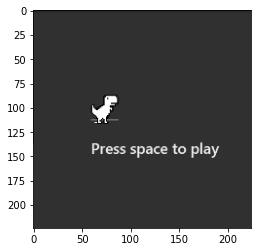

In [8]:
frame = screenshot_frame()
plt.imshow(frame, cmap='gray')

In [27]:
df = pd.DataFrame(columns=['frame', 'keystroke', 'time_elapsed'])

In [28]:
keyboard.wait('up')
time.sleep(1)
start = time.time()

counter = 0
while True: 
    frame = screenshot_frame()
    end = time.time()
    time_elapsed = end - start
    
    if not (keyboard.is_pressed('up') or keyboard.is_pressed('esc')):
        pass
        df = pd.concat([df, pd.DataFrame([{'frame': frame, 'keystroke': 'run', 'time_elapsed': time_elapsed}])], ignore_index=True)
   
    else:
        key_pressed = keyboard.read_key()
        if key_pressed == "esc":
            break

        elif key_pressed == 'up':
            df = pd.concat([df, pd.DataFrame([{'frame': frame, 'keystroke': 'up', 'time_elapsed': time_elapsed}])], ignore_index=True)
    counter += 1

In [29]:
df['keystroke'].value_counts()

run    10841
up       390
Name: keystroke, dtype: int64

In [15]:
df['time_elapsed']

0       0.028777
1       0.052289
2       0.080291
3       0.108289
4       0.135288
          ...   
1006    29.41658
1007    29.44358
1008    29.47058
1009    29.49958
1010    29.52658
Name: time_elapsed, Length: 1011, dtype: object

In [30]:
def export_images(frame, keystroke):  
    folder_name = 'run'
    if keystroke == 'up':
        folder_name = 'up'
    time.sleep(0.01)
    return cv2.imwrite(f'dataset_v2/{folder_name}/{datetime.now().strftime("%m-%d-%Y-%H-%M-%S-%f")}.png', frame)
    

In [31]:
df.apply(lambda x: export_images(x['frame'], x['keystroke']), axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
11226    True
11227    True
11228    True
11229    True
11230    True
Length: 11231, dtype: bool